<a href="https://colab.research.google.com/github/Priyabrat845/Topic-Modeling-on-News-Articles/blob/main/Topic_modeling_of_news_articles_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

## **Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import glob

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') 
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

#pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 1.2MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp37-none-any.whl size=98051304 sha256=15b8c4e39985f2c4a9b01a30d7cf529e1a47a829f1aa102d410163b2a5929890
  Stored in directory: /tmp/pip-ephem-wheel-cache-g4fg30bj/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
!pip install pyLDAvis==3.2.1

     |████████████████████████████████| 1.7MB 30.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136187 sha256=20838ddccf4ee98fa4f471901fb4422deedd1b179305999ea914bb7d9bd11b19
  Stored in directory: /root/.cache/pip/wheels/2f/cc/af/144c01e23fff8c11ef26e2fa161d98b7c2ae8c9a4f5cc48c2e
Successfully built pyLDAvis


## **Import Data**

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ="/content/drive/MyDrive/Almabetter/bbc"

In [ ]:
#Importing text file paths
business = glob.glob(path+'/business/*')
entertainment = glob.glob(path+'/entertainment/*')
politics = glob.glob(path+'/politics/*')
sports = glob.glob(path+'/sport/*')
tech = glob.glob(path+'/tech/*')

In [ ]:
business[0:5]

['/content/drive/MyDrive/Almabetter/bbc/business/004.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/025.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/006.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/019.txt',
 '/content/drive/MyDrive/Almabetter/bbc/business/020.txt']

In [ ]:
len(sports)

511

In [ ]:
sports_text=[]
try:
  for i in range(len(sports)):
    f=open(sports[i],errors='ignore')
    a=f.read()
    sports_text.append(a)
except:
  print('List ended !!')


In [ ]:
len(sports_text)

511

In [ ]:
sports_text

['Hansen \'delays return until 2006\'\n\nBritish triple jumper Ashia Hansen has ruled out a comeback this year after a setback in her recovery from a bad knee injury, according to reports.\n\nHansen, the Commonwealth and European champion, has been sidelined since the European Cup in Poland in June 2004. It was hoped she would be able to return this summer, but the wound from the injury has been very slow to heal. Her coach Aston Moore told the Times: "We\'re not looking at any sooner than 2006, not as a triple jumper." Moore said Hansen may be able to return to sprinting and long jumping sooner, but there is no short-term prospect of her being involved again in her specialist event. "There was a problem with the wound healing and it set back her rehabilitation by about two months, but that has been solved and we can push ahead now," he said. "The aim is for her to get fit as an athlete - then we will start looking at sprinting and the long jump as an introduction back to the competiti

In [ ]:
# Making the data lists for different topics.
def make_list(data):
    list = []
    for i in range(len(data)):
      file = open(data[i],'r')
      list.append(file.read())
    return(list)

In [ ]:
len(business)

510

In [ ]:
business_texts= make_list(business)
entertainment_text = make_list(entertainment)
politics_texts= make_list(politics)
#sport_texts= make_list(sports)
tech_text = make_list(tech)

In [ ]:
#Number of documents in every topics
print(len(business_texts),len(entertainment_text),len(politics_texts),len(sports_text),len(tech_text))

510 386 417 511 401


In [ ]:
# Combine the topics.
complete_text = business_texts + entertainment_text + politics_texts + sports_text + tech_text

In [ ]:
len(complete_text)

2225

From the above we can see that, the length of the complete text is 2225.

In [ ]:
!pip install -U pandas-profiling

     |████████████████████████████████| 256kB 21.9MB/s 
     |████████████████████████████████| 10.1MB 27.6MB/s 
     |████████████████████████████████| 645kB 28.5MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 1.1MB 28.9MB/s 
     |████████████████████████████████| 3.1MB 22.9MB/s 
     |████████████████████████████████| 112kB 43.4MB/s 
     |████████████████████████████████| 296kB 38.2MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=341b1a57841672a04ce644768dd0e668d781392b02858ded12aa5bcf1f75c93e
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=acb925dcf3acd3e711aeb09defcef6a93640bb20a08174e219d9ee7b35fd860f
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85

In [ ]:
# Make the dataframe of texts.
data = pd.DataFrame({'Texts': complete_text})
#data.head()

In [ ]:
len(data)

2225

In [ ]:
data.head(5)

,Texts
0,High fuel prices hit BA's profits\n\nBritish A...
1,Yukos loses US bankruptcy battle\n\nA judge ha...
2,Japan narrowly escapes recession\n\nJapan's ec...
3,India widens access to telecoms\n\nIndia has r...
4,Call centre users 'lose patience'\n\nCustomers...


In [ ]:
# Import the English stopwords.
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## **Data Cleaning**

In [ ]:
# Removal of "\n"
# Converting the words to the lowercase.
# Removal of stopword.

def text_processing(data):
  data = data.map(lambda x: x.replace('\n',' '))
  data = data.map(lambda x: x.lower())
  #data = data.map(lambda x: ''.join([i for i in x if i not in string.punctuation]))
  data = data.map(lambda x: ' '.join([i for i in x.split(' ') if i not in stopwords.words('english')]))
  return data

In [ ]:
data['Texts']= text_processing(data['Texts'])


In [ ]:
data.head()

,Texts
0,high fuel prices hit ba's profits british air...
1,yukos loses us bankruptcy battle judge dismis...
2,japan narrowly escapes recession japan's econ...
3,india widens access telecoms india raised lim...
4,call centre users 'lose patience' customers t...


In [ ]:
# Tokenizing the texts.
# Adding the "Number of sentences" column.

def number_of_sentences(data):

  data['Number of sentences'] = [len(i) for i in data['Texts'].apply(nltk.sent_tokenize)]
  return data.head()

In [ ]:
number_of_sentences(data)

,Texts,Number of sentences
0,high fuel prices hit ba's profits british air...,19
1,yukos loses us bankruptcy battle judge dismis...,23
2,japan narrowly escapes recession japan's econ...,9
3,india widens access telecoms india raised lim...,11
4,call centre users 'lose patience' customers t...,29


In [ ]:
# Printing the first 15 largest sentences.

data['Number of sentences'].nlargest(15)

1234    242
801     229
1302    148
2224    147
806     137
856     134
1195    134
2185    107
1829     89
1151     79
1811     79
1357     76
1423     76
1974     75
665      64
Name: Number of sentences, dtype: int64

In [ ]:
#remove punctuation

def remove_punctuation(data):
  data['Texts'] = data['Texts'].map(lambda x: ''.join([i for i in x if i not in string.punctuation]))
  return data.head(2)

In [ ]:
remove_punctuation(data)

,Texts,Number of sentences
0,high fuel prices hit bas profits british airw...,19
1,yukos loses us bankruptcy battle judge dismis...,23


In [ ]:
# number of words in a document 

def number_of_words(data):
  words_count = [len(i.split()) for i in data['Texts']]
  data['Number of words'] = words_count
  return data.head()

In [ ]:
number_of_words(data)

,Texts,Number of sentences,Number of words
0,high fuel prices hit bas profits british airw...,19,269
1,yukos loses us bankruptcy battle judge dismis...,23,267
2,japan narrowly escapes recession japans econo...,9,114
3,india widens access telecoms india raised lim...,11,177
4,call centre users lose patience customers try...,29,377


In [ ]:
# Number of Complex words in document
# Complex words are defined by the length of a word greater than 4

def count_complex_words(data):
  count_complex_words = []
  for i in data['Texts']:
    count = 0
    for j in range(len(i.split())):
      if len(i.split()[j])>4:
        count+=1
      if j == len(i.split())-1:
        count_complex_words.append(count)
  data['Number of Complex words'] = count_complex_words
  return data.head()

In [ ]:
count_complex_words(data)

,Texts,Number of sentences,Number of words,Number of Complex words
0,high fuel prices hit bas profits british airw...,19,269,173
1,yukos loses us bankruptcy battle judge dismis...,23,267,206
2,japan narrowly escapes recession japans econo...,9,114,90
3,india widens access telecoms india raised lim...,11,177,139
4,call centre users lose patience customers try...,29,377,256


In [ ]:
# Average length of sentences

def average_len_sentence(data):

  data['Average Length of sentence'] = np.int64(data['Number of words']/data['Number of sentences'])
  return (data.head())

In [ ]:
average_len_sentence(data)

,Texts,Number of sentences,Number of words,Number of Complex words,Average Length of sentence
0,high fuel prices hit bas profits british airw...,19,269,173,14
1,yukos loses us bankruptcy battle judge dismis...,23,267,206,11
2,japan narrowly escapes recession japans econo...,9,114,90,12
3,india widens access telecoms india raised lim...,11,177,139,16
4,call centre users lose patience customers try...,29,377,256,13


In [ ]:
#lemmetization of words in document

def lemmatize(data):
  lemmatizer = WordNetLemmatizer()
  data['Texts'] = data['Texts'].map(lambda x: ' '.join([lemmatizer.lemmatize(i) for i in x.split()]))
  return data['Texts'][0]

In [ ]:
lemmatize(data)

'high fuel price hit ba profit british airway blamed high fuel price 40 drop profit reporting result three month 31 december 2004 airline made pretax profit £75m 141m compared £125m year earlier rod eddington ba chief executive said result respectable third quarter fuel cost rose £106m 473 ba profit still better market expectation £59m expects rise fullyear revenue help offset increased price aviation fuel ba last year introduced fuel surcharge passenger october increased £6 £10 oneway longhaul flight shorthaul surcharge raised £250 £4 leg yet aviation analyst mike powell dresdner kleinwort wasserstein say ba estimated annual surcharge revenue £160m still way short additional fuel cost predicted extra £250m turnover quarter 43 £197bn benefiting rise cargo revenue looking ahead full year result march 2005 ba warned yield average revenue per passenger expected decline continues lower price face competition lowcost carrier however said sale would better previously forecast for year march 

In [ ]:
data.head()

,Texts,Number of sentences,Number of words,Number of Complex words,Average Length of sentence
0,high fuel price hit ba profit british airway b...,19,269,173,14
1,yukos loses u bankruptcy battle judge dismisse...,23,267,206,11
2,japan narrowly escape recession japan economy ...,9,114,90,12
3,india widens access telecom india raised limit...,11,177,139,16
4,call centre user lose patience customer trying...,29,377,256,13


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

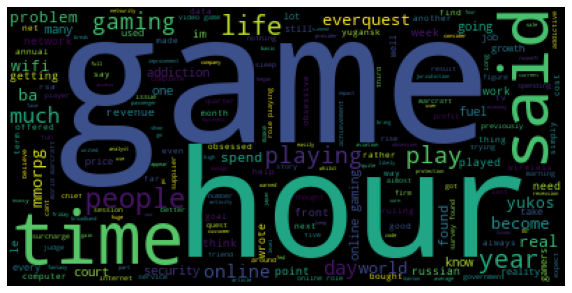

<Figure size 360x216 with 0 Axes>

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
text = data['Texts'].values 
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.figure(figsize=(5,3))
plt.show()


From the above worcloud we can see that:



*   **Said**, **Profit**, **Camera**, **Phone**, **Window**, **People**, **Image**, **Microsoft**, **Sale** have the most frequency.





In [ ]:
def words_count(data):
  count = []
  word = [] 
  all_words = ' '.join(data['Texts']).split()
  for i in set(all_words):
    word.append(i)
    count.append(all_words.count(i))
  word_count_df = pd.DataFrame({'Words': word,'Count':count},columns=['Words','Count']).sort_values(by='Count', ascending=False)
  return word_count_df

In [ ]:
word_count = words_count(data)
word_count[0:20]

,Words,Count
1152,said,7253
10665,mr,3045
4634,year,2830
12140,would,2577
19584,also,2156
25461,people,2044
4799,new,1970
23550,u,1910
14524,one,1809
7019,could,1510


In [ ]:
import plotly.express as px
px.bar(word_count[0:50],x = 'Words',y= 'Count',title='Words VS Frequency graph')
#plt.title('Words VS Frequency graph',size=15)

(0.0, 1000.0)

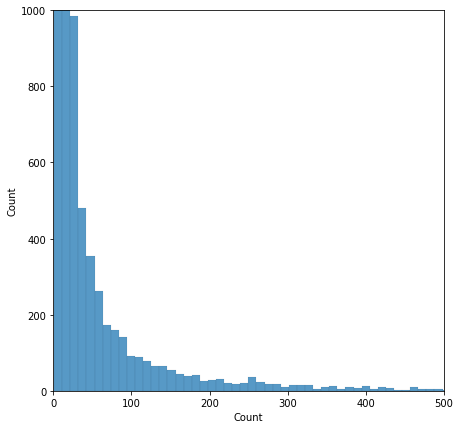

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(word_count['Count'],bins=700)
plt.xlim((0,500))
plt.ylim((0,1000))

(0.0, 10.0)

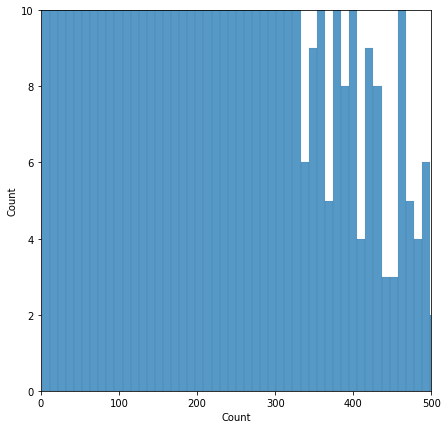

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(word_count['Count'],bins=700)
plt.xlim((0,500))
plt.ylim((0,10))

## **Model Building**

In [ ]:
import spacy
nlp = spacy.load("en_core_web_md", disable=['parser', 'ner'])

OSError: ignored

In [ ]:
# Tokenizing the words.

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [ ]:
text_list=data['Texts'].tolist()
print(text_list[1])
tokenized_texts = lemmatization(text_list)
print(tokenized_texts[1])

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(tokenized_texts)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_texts]

In [ ]:
# Creating the object for LDA model using gensim library
import gensim
from gensim import models
LDA = gensim.models.ldamodel.LdaModel

In [ ]:
# Build LDA model
# Taking Number of topics=10
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [ ]:
len(doc_term_matrix)

In [ ]:
# Print 10 topics with the weightage of words.
lda_model.print_topics()

In [ ]:
# Visualize the topics
import pyLDAvis
from pyLDAvis import gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

From the above we can see that, we getting maximum **overlap** between the different topics when number of topics is 10.

So, we need to optimise our model to reduce the overlap between the topics.

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Model having coherence score close to 1 is the best model for the topic modelling.

In [ ]:
import pyLDAvis
import pyLDAvis.gensim 
import gensim

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Min number of topics=2
# Max number of topics=20

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_texts, start=2, limit=20, step=1)


In [ ]:
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.title('Number of topics VS Coherence score',size=15)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

From the above graph we can clearly see that topic number=5 has the highest coherence score.


In [ ]:
# Print the coherence scores for various 
for m, cv in zip(x, coherence_values):
    print("Number Of Topics =", m, " has Coherence Value of", round(cv, 4))

Number of topics=5 has the higest coherence score of 0.4607.

In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, doc_term_matrix, dictionary)
vis


## **Conclusion**